# Exploratory Data Analysis - Correlation (& Covariance)

Before we look into what correlation is, one important concept we need to understand is covariance. In this tutorial we will look at variance, covariance, correlation and how to use these statistical metrics in data analysis.

We can describe/ summarize data using

1. Measures of central tendency (mean, median & mode)
2. Measures of spread (range, variance, standard deviation)

In this tutorial I will not go through what mean, median and mode are. If you think you need a quick recap, this webpage is a good read https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php

#### Variance

Variance is one of the measures of spread/ dispersion. It can be defined as the average of squared differences of the data points from mean.

<img src = "Capture.PNG">

Standard deviation is the root of variance. A point to note from the above formulae is that for sample we divide by 'n-1' (number of data points minus 1) while for population we divide by 'N' (Number of data points). This is known as bassel's correction. A sample is not an accurate representation of the population. Each sample comes with a sample error. Bassel's correction is used correct this sample error. 

Let's see how we can calculate variance using numpy in python.

In [1]:
import numpy as np
data = np.array ([100, -34, 78, 90, 10, -11, 23, -145, 10, 20])

In [2]:
mean = np.mean (data)
print (mean)

# if you do not want to use the inbuilt mean method you can loop across each element, compute the sum and then divide by
# number of elements
# Code:
suM = 0
for value in data:
    suM += value
print (suM/ len (data))

14.1
14.1


In [3]:
difference = data - mean
print (difference)

# numpy has the ability to broadcast a variable. When you subtract a value from an array/ matrix, the value gets subtracted from
# every element in the array/ matrix

[  85.9  -48.1   63.9   75.9   -4.1  -25.1    8.9 -159.1   -4.1    5.9]


In [4]:
squared = np.square (difference)
print (squared)

# the below operation will also give the squared values
print (difference ** 2)

[7.378810e+03 2.313610e+03 4.083210e+03 5.760810e+03 1.681000e+01
 6.300100e+02 7.921000e+01 2.531281e+04 1.681000e+01 3.481000e+01]
[7.378810e+03 2.313610e+03 4.083210e+03 5.760810e+03 1.681000e+01
 6.300100e+02 7.921000e+01 2.531281e+04 1.681000e+01 3.481000e+01]


In [5]:
sumOfSquaredDifferences = np.sum (squared)
print (sumOfSquaredDifferences)

45626.899999999994


In [6]:
variance = sumOfSquaredDifferences/ (len (data) - 1)
print (variance)

5069.655555555555


Too much code! To those who feel so, numpy has an inbuilt method to calculate variance of a given array. Along with the data, it takes in ddof (delta degrees of freedom) as one of its arguments. 

ddof can be given as the number of elements in the array subtracted by the degrees of freedom. This webpage is a good read on the what degrees of freedom is http://www.statisticshowto.com/degrees-of-freedom/

In [7]:
print (np.var (data, ddof = 1))

5069.655555555555


Now, we know what variance is and how to compute variance on given data. Lets now look at covariance!

#### Covariance

Lets divide the term into two, Co and Variance. We know that variance refers to the average of squared differences of the data points from mean. Co literally translates to joint/ mutual. So, when we speak about covraiance we are trying to look at how multiple data sets (or variables) vary with respect to each other. Using covariance we try to establish a relationship between these variables.

Before proceeding any further, one point to always keep in mind is that covariance can only establish linear relationships. There is very high chance that the variables are non-linearly related but covraiance is zero (or near zero). So, before calculating covariance we need to plot the variables. 

Lets look at a sample problem. We try to study the relationship between number of hours a student a studied and their test scores.

In [8]:
# We have only 10 students in the class
studyHours = np.array ([23.5, 10, 0.5, 16, 40, 12.5, 20, 28.5, 31, 26])
testScores = np.array ([78, 64, 20, 66, 98, 64, 73, 87, 91, 82])

Text(0,0.5,'Test Scores')

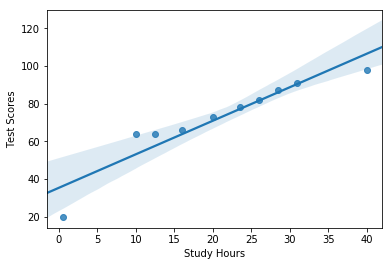

In [9]:
# lets the plot the data using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plot = sns.regplot (x = studyHours, y = testScores)
plot.set_xlabel ('Study Hours')
plot.set_ylabel ('Test Scores')

We can infer from the graph that the variables are linearly related and hence covariance can be applied here. Below is the formula to calculate covariance for two variables X and Y with n data points each
<img src = 'covariance.png'>

-> What can we infer from the result?

1. Direction of the relationship. 

        1.1. If the value is positive, there exists a positive linear relationship. 
             -> If the value of X increases, Y increases
             -> If X decreases, Y decreases
        1.2. If the values is negative, there is a negative linear relationship. 
             -> If X increases, Y decreases
             -> If X decreases, Y increases
        1.3. If the value is zero, the variables are not dependent. 
             -> If X increases, Y - 'I donno where to go bro!'
             -> If X decreases, Y - '@.@'

Text(0.5,1,'Negative Linear Relationship')

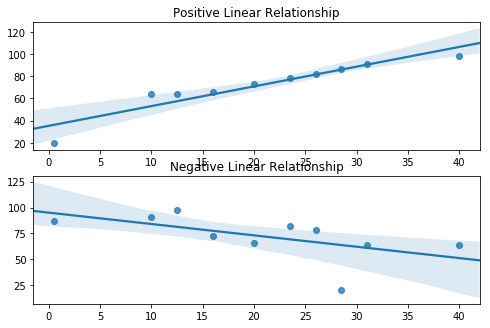

In [10]:
fig = plt.figure (figsize = (8, 8))
plt.subplot (3, 1, 1)
plot = sns.regplot (x = studyHours, y = testScores)
plot.set_title ("Positive Linear Relationship")
plt.subplot (3, 1, 2)
plot = sns.regplot (x = studyHours, y = testScores [:: -1])
plot.set_title ("Negative Linear Relationship")

2. Strength of the relationship. A large value could mean a stronger relationship. 

-> What can we not infer from the result?

1. Comparision of strengths. Suppose we have three variables X, Y1, Y2 with n values each and all of them on 'different scales'. We calculate the covariance of (X, Y1) to be + 29.98 and covariance of (X, Y2) to be + 69.93. We 'cannot' infer that (X, Y2) have a stronger relationship than (X, Y1) or vice-versa.

2. You can compare the strengths if Y1 and Y2 are on the same scale.

-> Lets calculate covariance between the study hours and test scores. Steps we need to follow to calculate covariance

1. Compute means of the variables
2. Subtract means from their respective data points
3. Multiply the corresponding data points
4. Add the values from the multiplied array
5. Divide by n - 1 (=9)

In [11]:
meanStudyHours = np.mean (studyHours)
meanTestScores = np.mean (testScores)
print (meanStudyHours)
print (meanTestScores)

20.8
72.3


In [12]:
differenceStudyHours = studyHours - meanStudyHours
differenceTestScores = testScores - meanTestScores
print (differenceStudyHours)
print (differenceTestScores)

[  2.7 -10.8 -20.3  -4.8  19.2  -8.3  -0.8   7.7  10.2   5.2]
[  5.7  -8.3 -52.3  -6.3  25.7  -8.3   0.7  14.7  18.7   9.7]


In [13]:
products = np.multiply (differenceStudyHours, differenceTestScores)
print (products)

[ 1.53900e+01  8.96400e+01  1.06169e+03  3.02400e+01  4.93440e+02
  6.88900e+01 -5.60000e-01  1.13190e+02  1.90740e+02  5.04400e+01]


In [14]:
suM = np.sum (products)
print (suM)

2113.1


In [15]:
covariance = suM/ (len (products) - 1)
print (covariance)

234.7888888888889


Too much code again! To those who feel so, numpy has an inbuilt method to calculate covariance of given arrays/ matrices.

In [16]:
print (np.cov (studyHours, testScores))

[[131.95555556 234.78888889]
 [234.78888889 474.01111111]]


LOL! a matrix? numpy knows nothing!? Nah, the values that numpy returned are:

1. First Row + First Column / array [0][0] = covariance (studyHours, studyHours)
2. First Row + Second COlumn / array [0][1] = covariance (studyHours, testScores)
3. Second Row + First Column / array [1][0] = covariance (testScores, studyHours)
4. Second Row + Second COlumn / array [1][1] = covariance (testScores, testScores)

numpy knows.

In [17]:
# this is what we want
print (np.cov (studyHours, testScores) [0, 1])

# or
print (np.cov (studyHours, testScores) [1, 0])

234.78888888888892
234.78888888888892


Note: Numpy calculates the covariance under the assumption that the data points provided are just samples. If you have the population data, use 

                    np.cov (studyHours, testScores, ddof = 0) [0, 1] 

#### Correlation

While looking at covariance, we came across the fact that covariance can describe strength of the relationship (higher the covariance value greater the strength). Seems too abstract ! What do you mean by higher, is it +100 or -1000? Do we have a number? Nah, covariance doesnt care bruh!

Enter Correlation!

Correlation can be used to measure the strength of the relationship. These values range from -1 to 1 with either extremes showing strong relationship and 0 showing no relationship.

1. +1 -> Strong positive relationship
2. -1 -> Strong negative relationship
3.  0 -> No relationship

One of the most common correlation methods used is the Pearson's Correlation Coeffient. Lets look at the formula for computing Pearson's Correlation Coefficient
<img src = 'correlation.png'>

We have samples (not population). So, we need to compute the sample standard deviation of studyHours and testScores. In the 'variance' section we learned to calculate variance of given array of data. If we square root the value, we get the standard deviation. I will use the inbuilt standard deviation function of numpy

In [18]:
studyHoursStdDev = np.std (studyHours, ddof = 1)
testScoresStdDev = np.std (testScores, ddof = 1)
print (studyHoursStdDev)
print (testScoresStdDev)

11.48719093406023
21.771796230699735


In [19]:
pearsonCoefficient = covariance / (studyHoursStdDev * testScoresStdDev)
print (pearsonCoefficient)

0.93879212929689


+0.93 indicates a strong positive linear relationship between the variables. We can say that higher the number of study hours, higher the test score and lower the number of study hours, lower the test score. We can compute the same using the inbuilt numpy function corrcoef.

In [20]:
print (np.corrcoef (studyHours, testScores))

[[1.         0.93879213]
 [0.93879213 1.        ]]


Again,

1. First Row + First Column / array [0][0] = correlation coefficient (studyHours, studyHours)
2. First Row + Second COlumn / array [0][1] = correlation coefficient (studyHours, testScores)
3. Second Row + First Column / array [1][0] = correlation coefficient (testScores, studyHours)
4. Second Row + Second COlumn / array [1][1] = correlation coefficient (testScores, testScores)

Below is what we need!

In [21]:
print (np.corrcoef (studyHours, testScores) [0, 1])

0.9387921292968902


Now, let us assume the testScores we observed have actually been reversed. Lets get the correct coefficient!

In [22]:
print (np.corrcoef (studyHours, testScores [::-1]) [0, 1])

-0.5788425844782158


Shows a negative linear relationship. The lesser you study, greater your test scores. How you wish !

Limitations of Pearson's coefficient:

1. Only applicable to linear data
2. Can only be applied on continuous data
3. Data needs to be normally distributed
4. No difference when the arrays the interchanged. It will give the same value if studyHours and testScores are interchanged. This could make you jump to incorrect conclusions like higher test scores are the reason for higher study scores !@?! We need to be careful when dealing with such data.

#### Feature analysis for building models

I got the data from https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data. I will not describe the data here. I will just show how to calculate the correlation coefficient using pandas

In [23]:
import pandas as pd
data = pd.read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", header = None)

In [27]:
print (data.corr (method = 'pearson'))

          0         9         10        11        12        13        16  \
0   1.000000 -0.531954 -0.357612 -0.232919 -0.541038 -0.227691 -0.105790   
9  -0.531954  1.000000  0.874587  0.795144  0.589435  0.776386  0.569329   
10 -0.357612  0.874587  1.000000  0.841118  0.491029  0.877728  0.683360   
11 -0.232919  0.795144  0.841118  1.000000  0.279210  0.867032  0.735433   
12 -0.541038  0.589435  0.491029  0.279210  1.000000  0.295572  0.067149   
13 -0.227691  0.776386  0.877728  0.867032  0.295572  1.000000  0.850594   
16 -0.105790  0.569329  0.683360  0.735433  0.067149  0.850594  1.000000   
20 -0.178515  0.249786  0.158414  0.181129  0.261214  0.151362  0.028971   
23 -0.035823 -0.470414 -0.670909 -0.642704 -0.048640 -0.757414 -0.653658   
24  0.034606 -0.544082 -0.704662 -0.677218 -0.107358 -0.797465 -0.677470   

          20        23        24  
0  -0.178515 -0.035823  0.034606  
9   0.249786 -0.470414 -0.544082  
10  0.158414 -0.670909 -0.704662  
11  0.181129 -0.642704 

Not all the columns are eligible for correlation analysis, but as I said I just wanted to show you how it could be done in python. Pandas has calculated the correlation between all the columns that it considers to be numerical in nature. If you want to get the correlation between two columns you do the following 
                        
                        data ['Column A'].corr (data ['Column B'])
                        
If you observe carefully, the diagonal is always filled with 1.00. 

We can visualize the correlation values using a heatmap. The scale to the right of the map indicates the strength of relationship between variables.

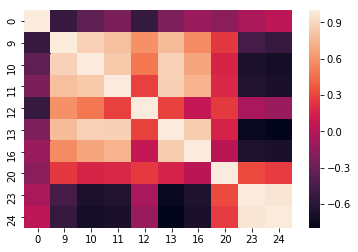

In [30]:
sns.heatmap (data.corr (method = 'pearson'))